# Libraries

In [27]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn import preprocessing, model_selection, naive_bayes, ensemble

# Dataset and features

In [28]:
adult = fetch_ucirepo(id=2)
X = adult.data.features
Y = adult.data.targets
adult_data = pd.concat([X, Y], axis=1)

In [29]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Preprocessing

## Handling NULL and missing values

In [31]:
for column in adult_data.columns:
    if adult_data[column].dtype == 'int64':
        zeros_count = (adult_data[column] == 0).sum()
        if zeros_count > 0:
            print(f"The {column} column has {zeros_count} zeros, which is {((zeros_count/32561)*100).round(2)}%"  )
        else:
            print(  "The " + column + " column doesn't have zeros."  )
    else:
        question_marks_count = (adult_data[column] == "?").sum()
        nan_count = adult_data[column].isna().sum()
        if question_marks_count > 0 or nan_count > 0:
            print(f"The {column} column has {question_marks_count} '?'s and {nan_count} nan values, which is {(((question_marks_count + nan_count)/32561)*100).round(2)}% "  )
        else:
            print(  "The " + column + " column doesn't have '?'s. or nan values"  )

# Removing the '?' and nan values from the dataset by imputing the mean for the missing values
# Removing the . from some values in the income column
for column in adult_data.columns:
    modal_value = adult_data[column].mode()[0]
    if adult_data[column].dtype == 'object':
        adult_data[column].replace("?", modal_value, inplace=True)
        adult_data[column].fillna(modal_value, inplace=True)
        adult_data[column].replace("<=50K.", "<=50K", inplace=True)
        adult_data[column].replace(">50K.", ">50K", inplace=True)

# Looping through each column to find which have missing values
for column in adult_data.columns:
    if adult_data[column].dtype == 'int64':
        # Ignore the missing integer values since there are none, capital gain and loss are correctly 0.
        continue
    else:
        question_marks_count = (adult_data[column] == "?").sum()
        nan_count = adult_data[column].isna().sum()
        if question_marks_count > 0 or nan_count > 0:
            print(  f"The {column} column has {question_marks_count} '?'s and {nan_count} nan values, which is {(((question_marks_count + nan_count)/32561)*100).round(2)}% "  )
        else:
            print(  "The " + column + " column doesn't have '?'s or nan values."  )

The age column doesn't have zeros.
The workclass column has 1836 '?'s and 963 nan values, which is 8.6% 
The fnlwgt column doesn't have zeros.
The education column doesn't have '?'s. or nan values
The education-num column doesn't have zeros.
The marital-status column doesn't have '?'s. or nan values
The occupation column has 1843 '?'s and 966 nan values, which is 8.63% 
The relationship column doesn't have '?'s. or nan values
The race column doesn't have '?'s. or nan values
The sex column doesn't have '?'s. or nan values
The capital-gain column has 44807 zeros, which is 137.61%
The capital-loss column has 46560 zeros, which is 142.99%
The hours-per-week column doesn't have zeros.
The native-country column has 583 '?'s and 274 nan values, which is 2.63% 
The income column doesn't have '?'s. or nan values
The workclass column doesn't have '?'s or nan values.
The education column doesn't have '?'s or nan values.
The marital-status column doesn't have '?'s or nan values.
The occupation col



Distinct values in the age column:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


Distinct values in the workclass column:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


Distinct values in the fnlwgt column:
[ 77516  83311 215646 ... 173449  89686 350977]


Distinct values in the education column:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


Distinct values in the education-num column:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Distinct values in the marital-status column:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


Distinct valu

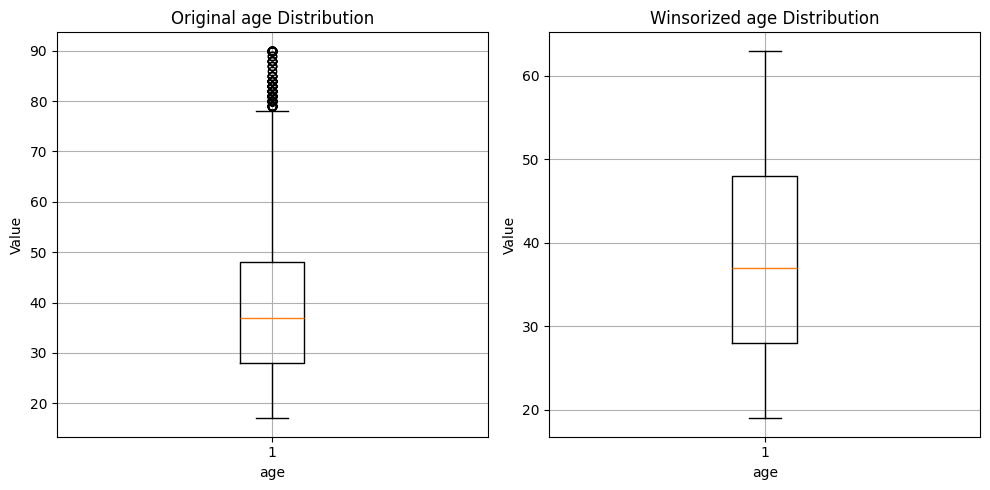

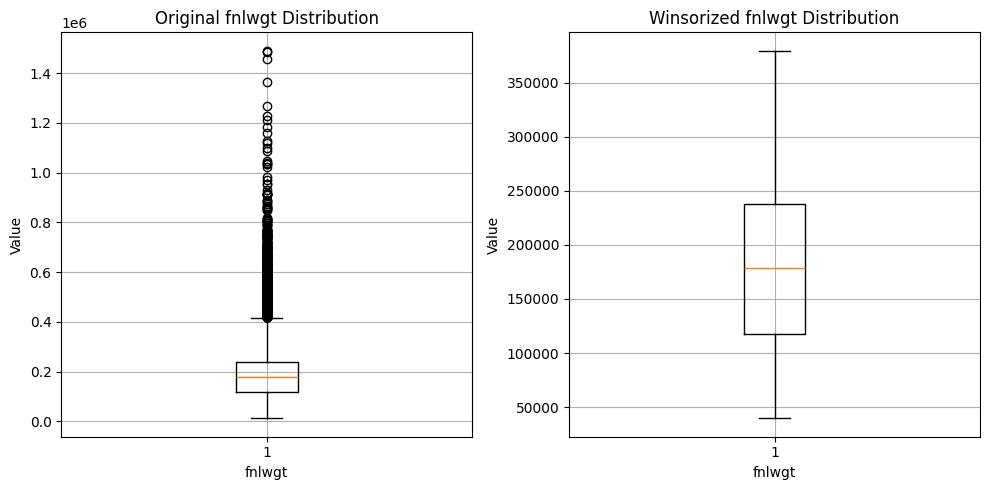

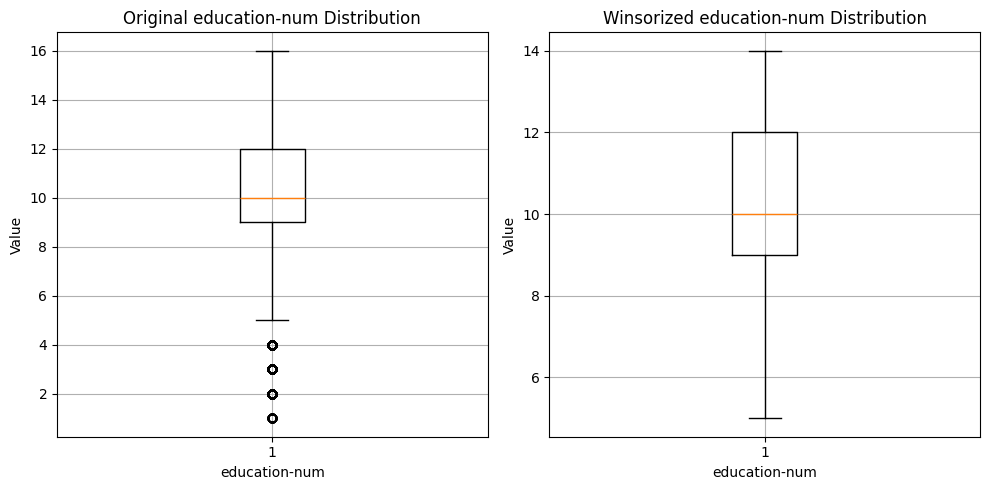

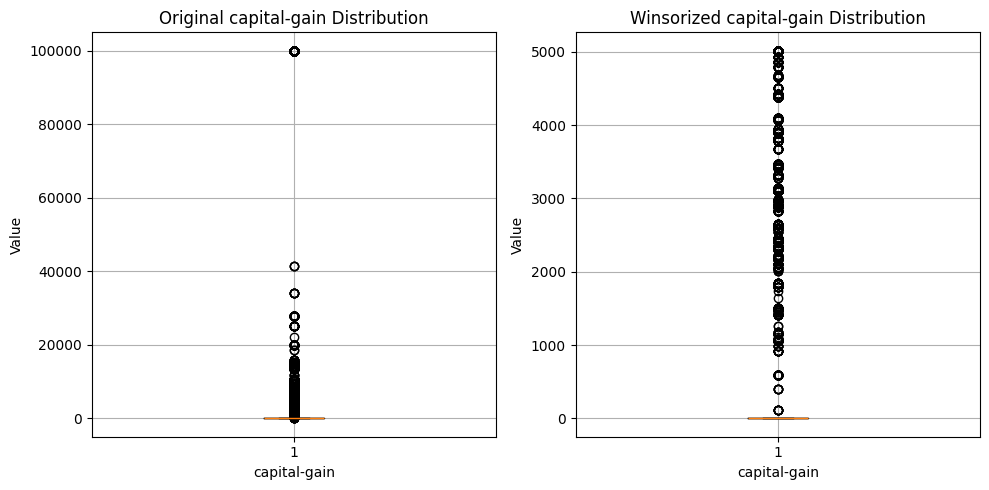

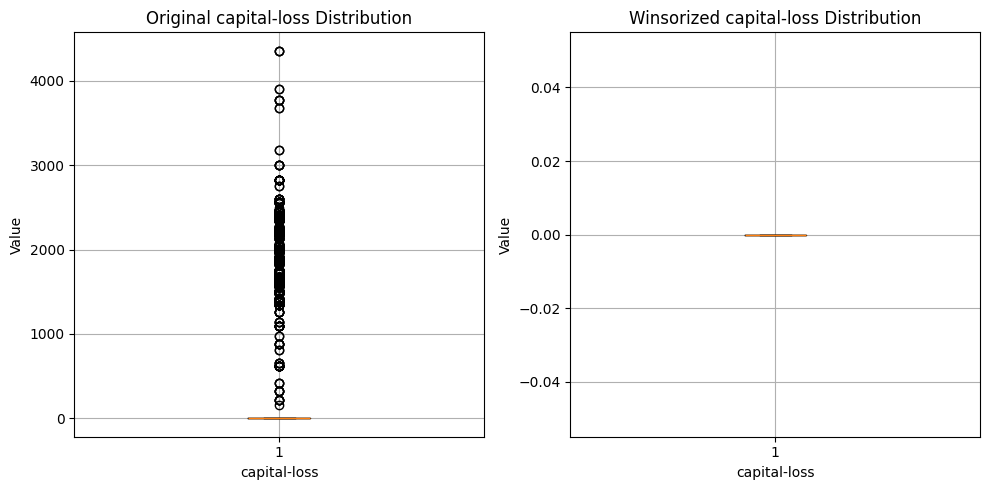

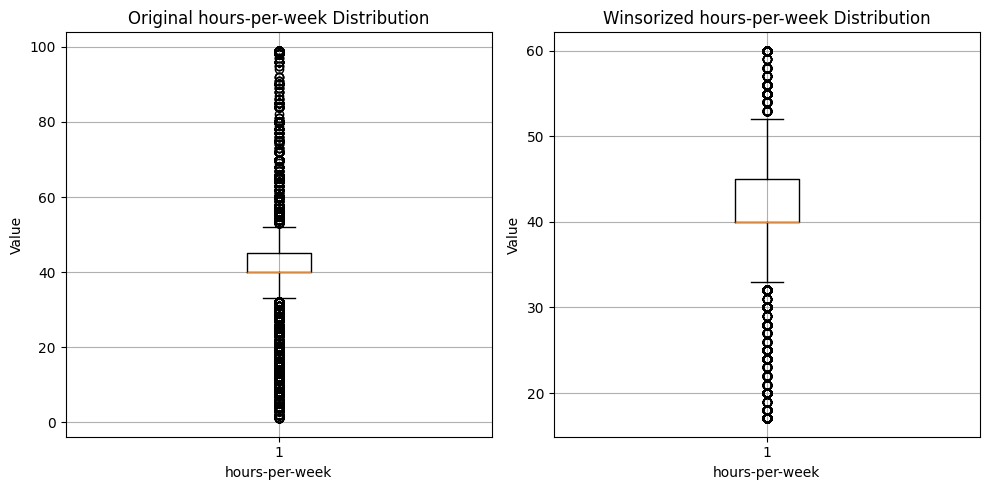

In [32]:
# Display all unique values for each column
for col in adult_data.columns:
    print("\n\nDistinct values in the", col, "column:")
    print(adult_data[col].unique())

# Outlier handling using visualization and winsorization
for col in adult_data.columns:
    if adult_data[col].dtype == 'int64':
        # Defining winsorization thresholds
        percentiles = adult_data[col].quantile([0.05, 0.95])
        lower_limit = percentiles[0.05]
        upper_limit = percentiles[0.95]
        adjusted_col = adult_data[col].copy()
        adjusted_col = np.clip(adjusted_col, lower_limit, upper_limit)
        # Plotting original and adjusted distributions
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.boxplot(adult_data[col], showfliers=True)
        plt.xlabel(col)
        plt.ylabel('Value')
        plt.title(f'Original {col} Distribution')
        plt.grid(True)
        plt.subplot(122)
        plt.boxplot(adjusted_col, showfliers=True)
        plt.xlabel(col)
        plt.ylabel('Value')
        plt.title(f'Winsorized {col} Distribution')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [33]:
# Descriptive statistics of numerical features
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


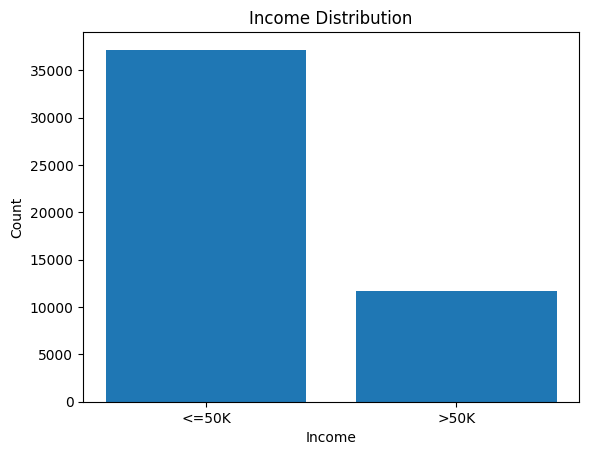

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [34]:
# Visualizing the income distribution
income_distribution = adult_data['income'].value_counts()
plt.bar(income_distribution.index, income_distribution.values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()
print(income_distribution)

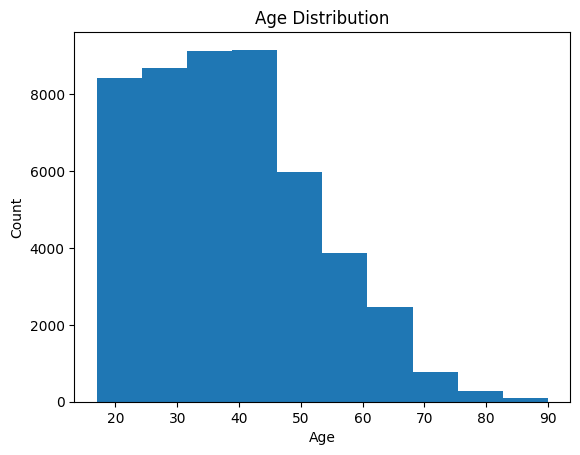

In [35]:
# Visualizing the age distribution
plt.hist(adult_data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

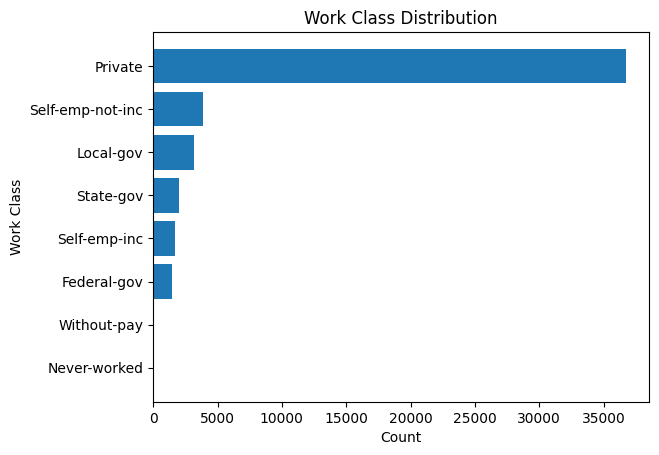

In [36]:
# Visualizing the distribution of work classes
workclass_distribution = adult_data['workclass'].value_counts()
plt.barh(workclass_distribution.index, workclass_distribution.values)
plt.xlabel('Count')
plt.ylabel('Work Class')
plt.title('Work Class Distribution')
plt.gca().invert_yaxis()
plt.show()

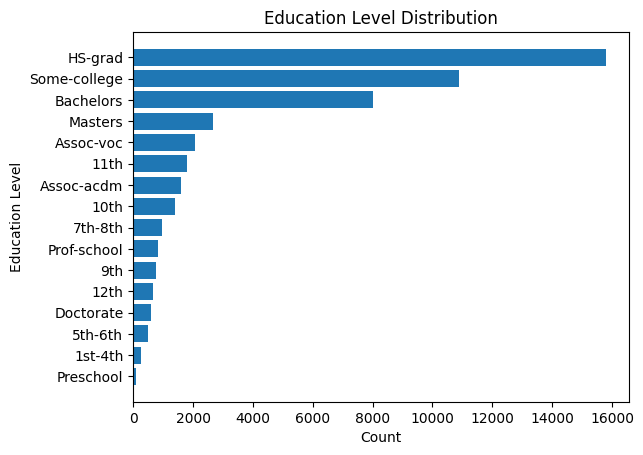

In [37]:
# Visualizing the distribution of education levels
education_distribution = adult_data['education'].value_counts()
plt.barh(education_distribution.index, education_distribution.values)
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.title('Education Level Distribution')
plt.gca().invert_yaxis()
plt.show()

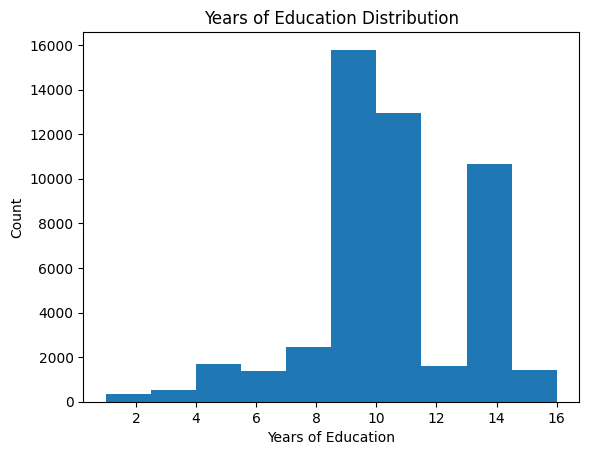

In [38]:
# Visualizing the distribution of years of education
plt.hist(adult_data['education-num'])
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.title('Years of Education Distribution')
plt.show()

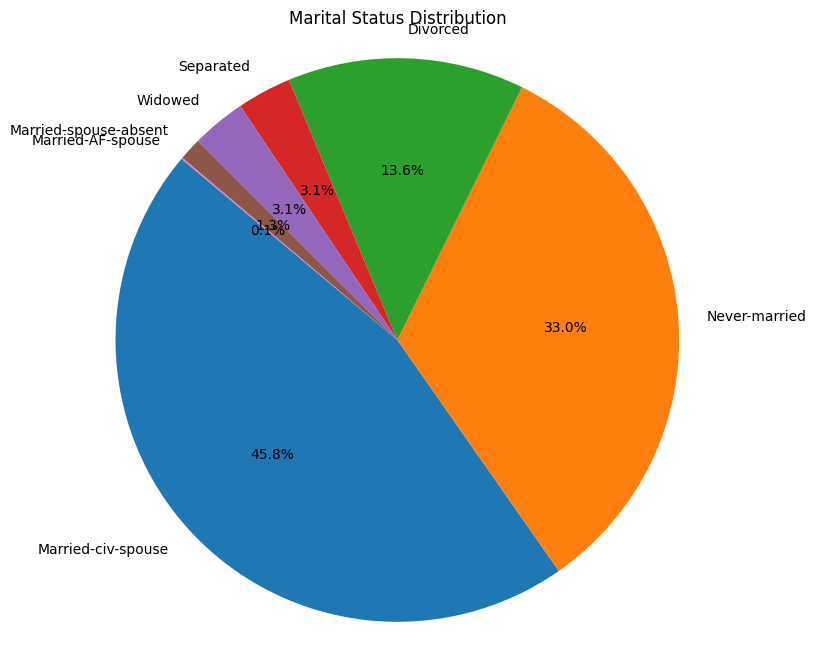

In [39]:
# Visualizing the marital status distribution
plt.figure(figsize=(8, 8))
plt.pie(adult_data['marital-status'].value_counts(), labels=adult_data['marital-status'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.show()

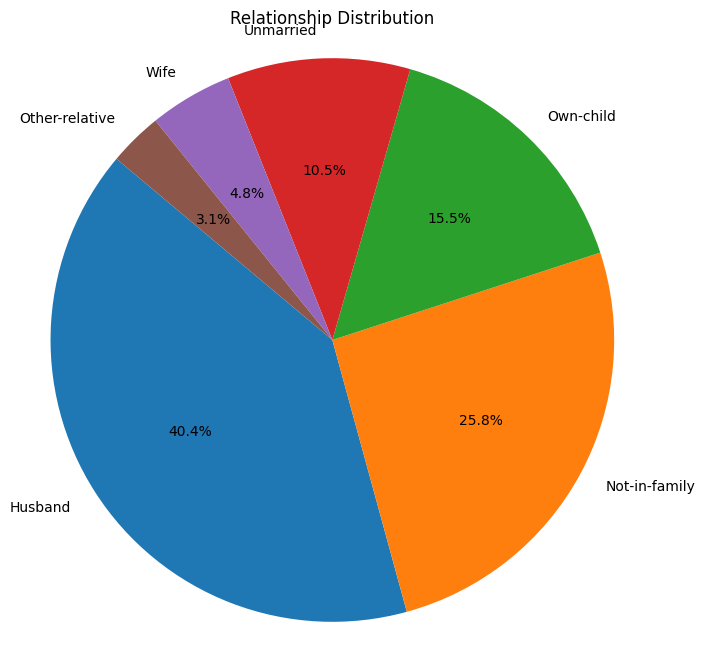

In [40]:
# Visualizing the relationship distribution
plt.figure(figsize=(8, 8))
plt.pie(adult_data['relationship'].value_counts(), labels=adult_data['relationship'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Relationship Distribution')
plt.axis('equal')
plt.show()

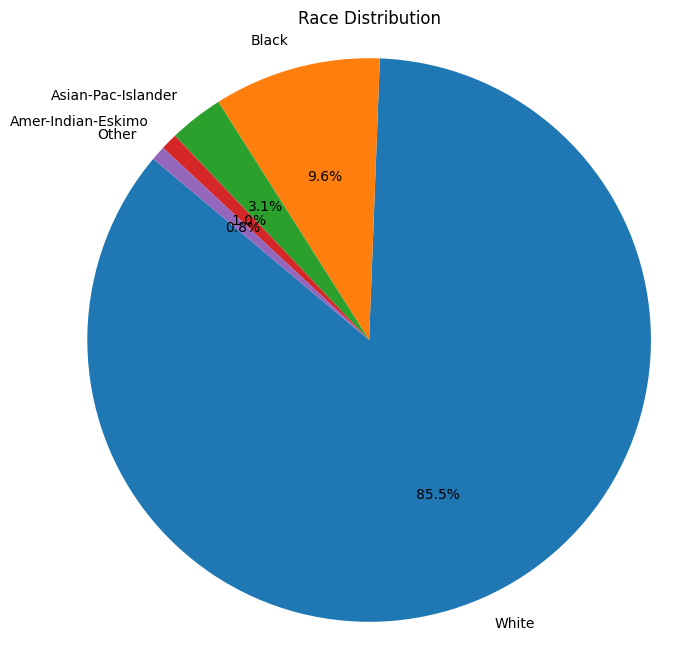

In [41]:
# Visualizing the race distribution
plt.figure(figsize=(8, 8))
plt.pie(adult_data['race'].value_counts(), labels=adult_data['race'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Race Distribution')
plt.axis('equal')
plt.show()

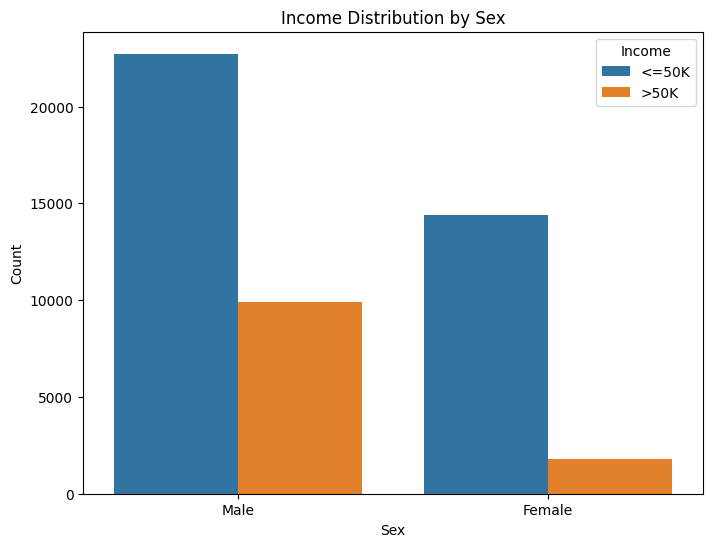

In [42]:
# Visualizing the distribution of sex and income
plt.figure(figsize=(8, 6))
sns.countplot(data=adult_data, x='sex', hue='income')
plt.title('Income Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

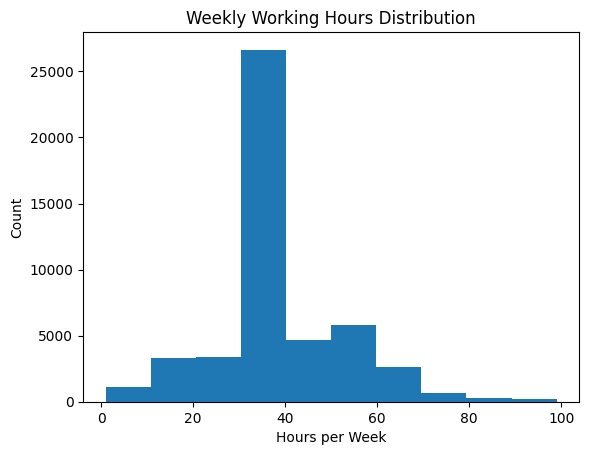

In [43]:
# Visualizing the distribution of weekly working hours
plt.hist(adult_data['hours-per-week'])
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('Weekly Working Hours Distribution')
plt.show()

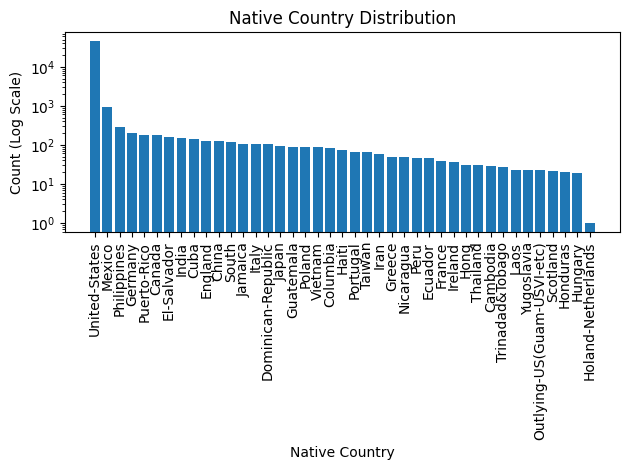

In [44]:
# Visualizing the native country distribution
native_country_distribution = adult_data['native-country'].value_counts()
plt.bar(native_country_distribution.index, native_country_distribution.values)
plt.yscale('log')
plt.xlabel('Native Country')
plt.ylabel('Count (Log Scale)')
plt.title('Native Country Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [49]:
scaled_df = adult_data

# Confirming the transformation
scaled_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


Removing 'workclass' with correlation 0.0
Removing 'fnlwgt' with correlation 0.01
Removing 'native-country' with correlation 0.02
1    37155
0    37155
Name: count, dtype: int64
======== Naive Bayes Classifier Results ========
Accuracy: 68.13
F1 Score: 55.63
======== Random Forest Classifier Results ========
Accuracy: 90.76
F1 Score: 90.98
Naive Bayes: Accuracy - 68.13 | F1 Score - 55.63
Random Forest: Accuracy - 90.76 | F1 Score - 90.98
======== Naive Bayes Detailed Metrics ========
Precision and Recall statistics:
              precision    recall  f1-score   support

           0       0.63      0.94      0.75      7606
           1       0.87      0.41      0.56      7256

    accuracy                           0.68     14862
   macro avg       0.75      0.68      0.65     14862
weighted avg       0.74      0.68      0.66     14862



======== Random Forest Detailed Metrics ========
Precision and Recall statistics:
              precision    recall  f1-score   support

           0

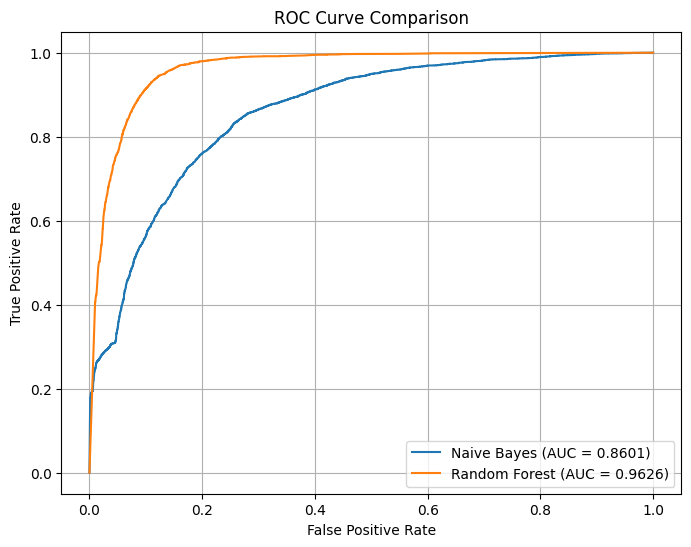

In [51]:
# Separating features and target
X_features = scaled_df.drop("income", axis=1)
y_target = scaled_df["income"]

# Correlation matrix to identify influential features
correlation_values = abs(scaled_df.corr()['income']).sort_values()
# Removing features with low correlation
for i in range(len(correlation_values)):
    if correlation_values.iloc[i] < 0.03:
        feature = correlation_values.index[i]
        X_features = X_features.drop(feature, axis=1)
        print(f"Removing '{feature}' with correlation {correlation_values.iloc[i].round(2)}")

# Verifying feature selection
X_features

# Handling class imbalance through oversampling
minority_class = y_target.value_counts().idxmin()
X_copy = X_features.copy()
y_copy = y_target.copy()

# Oversampling minority class
minority_X = X_copy[y_copy == minority_class]
minority_y = y_copy[y_copy == minority_class]
oversampled_minority_X = sklearn.utils.resample(minority_X, replace=True, n_samples=len(y_copy[y_copy != minority_class]))
oversampled_minority_y = pd.Series([minority_class] * len(oversampled_minority_X))

# Combining oversampled minority with majority class data
X_balanced = pd.concat([oversampled_minority_X, X_copy[y_copy != minority_class]])
y_balanced = pd.concat([oversampled_minority_y, y_copy[y_copy != minority_class]])

# Verifying class balance
print(y_balanced.value_counts())

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_balanced, y_balanced, test_size=0.2)

# Naive Bayes Classifier Implementation
nb_model = sklearn.naive_bayes.GaussianNB()
# Training the model
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Evaluating Naive Bayes Classifier
nb_accuracy = round(sklearn.metrics.accuracy_score(y_test, nb_predictions) * 100, 2)
nb_f1 = round(sklearn.metrics.f1_score(y_test, nb_predictions) * 100, 2)
nb_report = sklearn.metrics.classification_report(y_test, nb_predictions)
print('======== Naive Bayes Classifier Results ========')
print('Accuracy:', nb_accuracy)
print('F1 Score:', nb_f1)

# Random Forest Classifier Implementation
rf_model = sklearn.ensemble.RandomForestClassifier()
# Training the model
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluating Random Forest Classifier
rf_accuracy = round(sklearn.metrics.accuracy_score(y_test, rf_predictions) * 100, 2)
rf_f1 = round(sklearn.metrics.f1_score(y_test, rf_predictions) * 100, 2)
rf_report = sklearn.metrics.classification_report(y_test, rf_predictions)
print('======== Random Forest Classifier Results ========')
print('Accuracy:', rf_accuracy)
print('F1 Score:', rf_f1)

# Comparing the models
print(f"Naive Bayes: Accuracy - {nb_accuracy} | F1 Score - {nb_f1}")
print(f"Random Forest: Accuracy - {rf_accuracy} | F1 Score - {rf_f1}")

# Detailed evaluation metrics for both models
print("======== Naive Bayes Detailed Metrics ========")
print("Precision and Recall statistics:")
print(nb_report)
print("\n")

print("======== Random Forest Detailed Metrics ========")
print("Precision and Recall statistics:")
print(rf_report)
print("\n")

# Calculating ROC curve for Naive Bayes
nb_probabilities = nb_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (> $50K)
nb_fpr, nb_tpr, nb_thresholds = sklearn.metrics.roc_curve(y_test, nb_probabilities)
nb_auc = sklearn.metrics.roc_auc_score(y_test, nb_probabilities)

# Calculating ROC curve for Random Forest
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (> $50K)
rf_fpr, rf_tpr, rf_thresholds = sklearn.metrics.roc_curve(y_test, rf_probabilities)
rf_auc = sklearn.metrics.roc_auc_score(y_test, rf_probabilities)

# Plotting ROC curves
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.4f)' % nb_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.4f)' % rf_auc)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()